# Fundamentals - Inferential Statistics 1 

Confidence Intervals.
We previously showed that when you take repeated, random samples from a population and take the mean and plot the distribution, you obtain a sampling distribution of the sample mean. Using  this information, we will show how we can make inferences about the underlying population when we start from one random sample.

Example: Given a population that has individual values 0 or 1, if we take a random sample, p<sub>A</sub>. What is the probability that it is within 2 $\sigma$ <sub>p&#x0302;</sub> of p?

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample
from scipy.stats import bernoulli, binom
import seaborn as sns

In [5]:
# Population is best modeled by a Bernoulli distribution. This a discrete distribution that has a success with probability p, and failure with probability 1-p
p = 0.6
N_samples = 10000
population_data = bernoulli(p).rvs(N_samples)

Text(0.5, 0, 'Outcome')

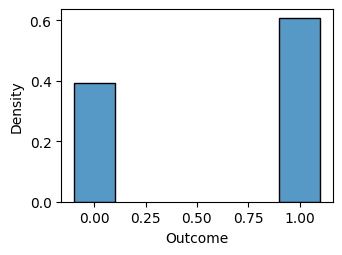

In [6]:
plt.subplots(figsize=(3.5, 2.5))
sns.histplot(population_data, stat="density", discrete=True, shrink=0.2)
plt.xlabel("Outcome")

For a bernoulli distribution, it is worth mentioning that the Expected Value $\mu$ is equal to the average. <br>
The expected value E(X) is the weighted sum of each of the outcomes.

E(X) = p*1 + (1-p)*0 = p <br>
$\sigma$ <sup>2</sup> = p(1-p)

A binomial distribution is the probability distribution of the number of successes in a fixed number of independent Bernoulli trials, where: <br>
E(X) = np <br>
$\sigma$ <sup>2</sup> = np(1-p)

Also, the binomial distribution describes the probability of getting "k" successes (usually denoted as "X = k") out of "n" trials, where each trial follows a Bernoulli distribution with probability "p"

The bernoulli distribution is a special case of the binomial distribution as it represents the probability distribution when there are N=1 trials


As an aside, let's review the binomial distribution, where we take samples of size N = 6. The expected value per bernoulli trial is the sum of the bernoulli outcome across 6 trials, repeated 1000000 times:

In [7]:
n=6
p = 0.3
Y = bernoulli(p)
Y_samples = [Y.rvs(1000000) for i in range(6)]
Z_samples = sum(Y_samples)


Text(0.5, 0, 'Outcome from 6 trials')

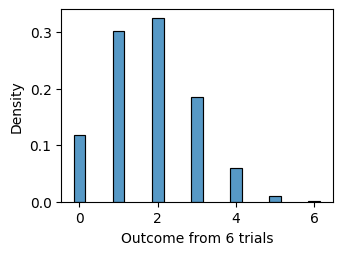

In [8]:
plt.subplots(figsize=(3.5, 2.5))
sns.histplot(Z_samples, stat="density", discrete=True, shrink=0.3)
plt.xlabel("Outcome from 6 trials")

Back to our original example:

In [9]:
p = 0.6
num_samples = 100000
sample_size = 1000
population_data = bernoulli(p).rvs(num_samples)

In [10]:
# Take random samples and calculate the mean
def rand_sample_calc_proportion(num_samples, sample_size, population):
    mean_list = np.zeros(num_samples)
    for n in range(num_samples):
        random_sample = np.random.choice(population, size = sample_size, replace = True)
        mean_list[n] = np.mean(random_sample)
    return mean_list

In [11]:
sampling_distribution = rand_sample_calc_proportion(num_samples, sample_size, population_data)
p_estimate= np.mean(sampling_distribution)
sigma_estimate = np.std(sampling_distribution)
print(f'mean of sampling distribution: {p_estimate} , std of sampling distribution: {sigma_estimate}')

mean of sampling distribution: 0.60158717 , std of sampling distribution: 0.015524067166535333


# The logic of a confidence interval

Here is our point estimate from one random sample, p&#x0302;

In [14]:
sample_proportion = rand_sample_calc_proportion(1, sample_size, population_data)
p_hat = np.mean(sample_proportion)
print(f'single sample proportion, p_hat = {p_hat}')

single sample proportion, p_hat = 0.613


Text(0.5, 0, 'Sampling Distribution of the Proportion')

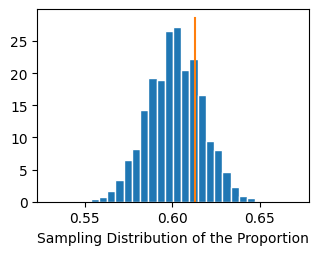

In [17]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))
count, bins, ignored = ax.hist(sampling_distribution, 30, density=True, edgecolor='white')
ylim = plt.gca().get_ylim()
ax.plot([p_hat, p_hat], ylim)
plt.xlabel("Sampling Distribution of the Proportion")

Or more generally, since we already know that this sampling distribution approximates the normal distribution. we can ask:

what is the probability that our point estimate:

p&#x0302; > p + 2 $\sigma$ <sub>p&#x0302;</sub> <br>
p&#x0302; < p - 2 $\sigma$ <sub>p&#x0302;</sub> <br>

The answers to both is 2.5%

Rearranging this, we get the probability of p&#x0302; being within 2 $\sigma$ of p:

P( p - 2 $\sigma$ <sub> p&#x0302; </sub> <  p&#x0302; < p + 2 $\sigma$ <sub>p&#x0302;</sub> ) = 1 - 2(2.5) = 95%

This is equivalent to saying: <br>

P( p&#x0302; - 2 $\sigma$ <sub> p&#x0302; </sub> <  p < p&#x0302; + 2 $\sigma$ <sub>p&#x0302;</sub> ) = 95%

# Estimating $\sigma$ <sub> p&#x0302;

$\sigma$ <sub> p&#x0302; is the standard deviation of the sampling distribution. 

We can either calculate it empirically if we have access to all the sample data. Typically, if we know p, the population mean, we can calculate it as:

$\sigma$ <sub> p&#x0302; </sub> = sqrt(p(1-p)/N)   * N being the sample size

if p is unknown, as it often is, we can use p&#x0302; to approximate it:

SE(p&#x0302;) = sqrt(p&#x0302; * (1 - p&#x0302;) / N)

# Interpreting confidence interval

A 95% confidence interval is expressed as p&#x0302; - 2 $\sigma$ <sub> p&#x0302; </sub> <  p < p&#x0302; + 2 $\sigma$ <sub>p&#x0302;</sub> <br> 
or p~= p&#x0302; +/- 2*$\sigma$ <sub> p&#x0302; </sub>

<b>What this means if we were to repeatedly sample from this population, 95% of the time the true population parameter will fall be between this interval</b>

Confidence Interval Assumptions:
1) Samples are independently draw with replacement OR < 10% of the total population size
2) Sample size is at least np >= 10 and n(1-p) >= 10 (10 examples of each)
